# GRO620 - Activité procédurale 2

Dans cette activité procédurale, nous allons poser les bases dufiltrage numérique d'images. Vous reconnaîtrez des éléments du filtrage numérique que vous avez vu en S4.

Pour chaque question impliqant de la programmation, commencez par discuter de la procédure à suivre pour résoudre le problème. Nous validerons l'approche en classe avant de se lancer dans l'implémentation.

In [128]:
# Préambule

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Si vous utilisez Google Colab, vous devez d'abord monter votre Google Drive
## où se trouve vos données.
## Commentez les trois lignes suivantes en ajustant le chemin vers votre propre
## dossier :

# from google.colab import drive
# drive.mount('/content/gdrive')
# %cd /content/gdrive/MyDrive/gro620-e21

## Pour retrouver le chemin depuis Jupyter, vous pouvez utiliser ceci :
# !ls /content/gdrive/MyDrive


## Encodage de l'image

Pour les questions suivantes, vous aurez probablement besoin de lire la documentation de cv2.imread et matplotlib.pyplot.imshow :

[imread](https://pythonexamples.org/python-opencv-read-image-cv2-imread/)

[imshow](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html)

Le code suivant charge une image et l'affiche en ligne :

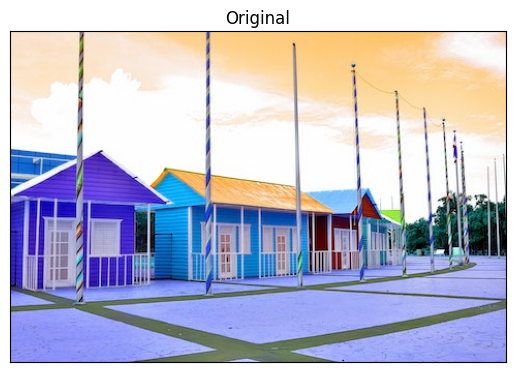

In [129]:
img_color = cv.imread("images_doc/proc1-q3-color.jpeg")
assert img_color is not None

plt.imshow(img_color)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.show()

(source de l'image: [PixaBay, Pexels](https://www.pexels.com/photo/apartment-architecture-block-blue-534124/))

### Q1.1

**a)** Ouvrez directement l'image dans un autre logiciel (le fichier se trouve dans images_doc/proc1-q3-color.jpeg) et comparez le résultat. Que remarquez vous ?

Les couleurs sont différentes.

Explication: l'image est stockée en mémoire sous format BGR, mais `matplotlib.pyplot` interprète l'image sous format RGB, donc les canaux "rouge" et "bleu" sont inversés.

**b)** Affichez seulement le premier canal de couleurs de l'image. Pensez à analyser la composition de la matrice image que OpenCV vous retourne. Expliquez ensuite ce que vous voyez.

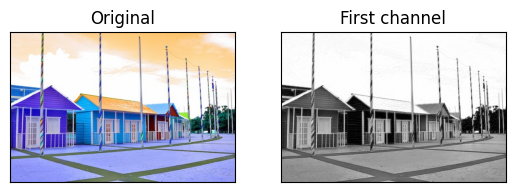

In [130]:
plt.subplot(1, 2, 1), plt.imshow(img_color)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(img_color[:, :, 0], "gray")
plt.title("First channel"), plt.xticks([]), plt.yticks([])

plt.show()

**c)** Transformez maintenant l'image pour que les couleurs correspondent à ce que vous voyez en dehors de Jupyter.

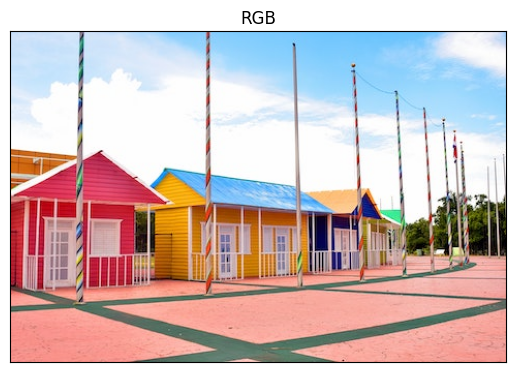

In [131]:
rgb = img_color.copy()  # Permet de forcer une copie de l'image.
# rgb = img_color aurait modifié l'originale.

rgb[:, :, 0], rgb[:, :, 2] = img_color[:, :, 2], img_color[:, :, 0]

plt.imshow(rgb)
plt.title("RGB"), plt.xticks([]), plt.yticks([])

plt.show()

### Q1.2

Soit cette couleur dans l'espace Y'CbCr (on suppose chaque valeur comme étant encodée sur 8 bits) :

$c = [100, 150, 150]$

Trouvez sa valeur équivalente dans l'espace RGB.

In [132]:
c = np.array([100, 150, 150], dtype=np.uint8)


def YCrCb2RGB(color: tuple[int, int, int]):
    """
    Converts Y'CbCr to RGB (ITU-R BT.601 standard).

    Args:
        color: Y'CrCb formatted color (8-bits).
    """
    rgb2ycbcr = np.array(
        [
            [0.299, 0.587, 0.114],
            [-0.168736, -0.331264, 0.5],
            [0.5, -0.418688, -0.081312],
        ],
        dtype=np.float32,
    )
    ycbcr2rgb = np.linalg.inv(rgb2ycbcr)
    Y, Cb, Cr = float(color[0]), float(color[1]), float(color[2])
    Cb -= 128
    Cr -= 128

    [R, G, B] = ycbcr2rgb @ [Y, Cb, Cr]

    rgb = np.array([R, G, B], dtype=np.uint8)
    return rgb


c_rgb = YCrCb2RGB(c)

print(f"RGB color: {c_rgb}")


RGB color: [130  76 138]


## Filtrage point à point

### Q2.1

Soit cette image (chargée par OpenCV et affichée par matplotlib): 

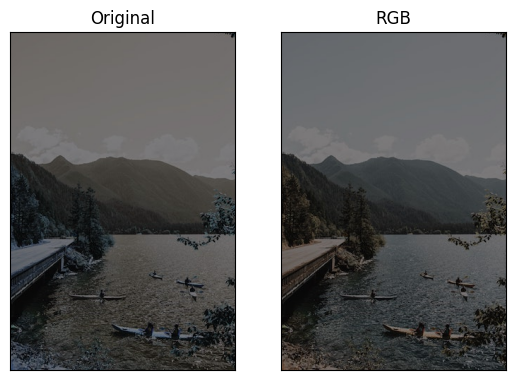

In [133]:
img_q31_org = cv.imread("images_doc/proc2-q1-dock.jpeg")
assert img_q31_org is not None
img_q31_rgb = cv.cvtColor(img_q31_org, cv.COLOR_BGR2RGB)

plt.subplot(1, 2, 1), plt.imshow(img_q31_org)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(img_q31_rgb)
plt.title("RGB"), plt.xticks([]), plt.yticks([])

plt.show()

(Source de l'image originale : [Vlada Karpovich, Pexels](https://www.pexels.com/photo/snow-wood-landscape-mountains-4450090/))

Cette fonction affiche l'histogramme des trois composantes de l'image :

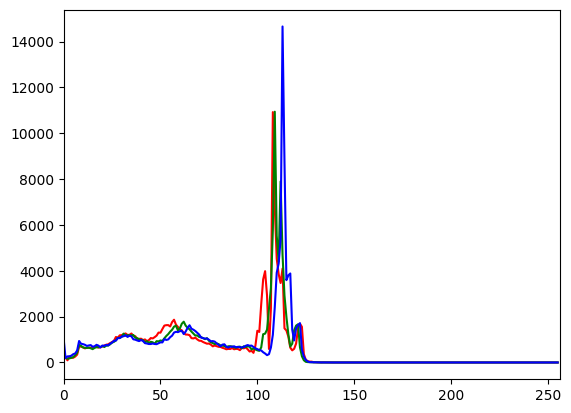

In [134]:
channels = ("r", "g", "b")
for i, col in enumerate(channels):
    hist = cv.calcHist([img_q31_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

Ajustez la plage dynamique en luminosité de l'image pour qu'elle couvre l'ensemble des valeurs possibles.

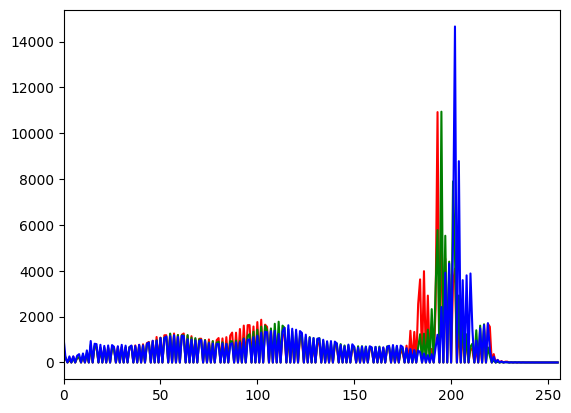

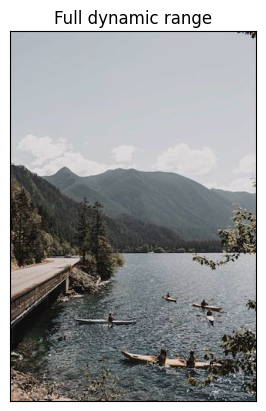

In [135]:
# NOTE: On convertit d'abord en float32 dans la plage [0,1] pour
# simplifier la manipulation des images avec des facteurs non-entiers.
# Matplotlib détecte ceci et affichera l'image correctement.
img_q31_f = np.float32(img_q31_rgb) / 255.0


def adjust_dynamic_range(img):
    _min = img.min()
    _max = img.max()
    return (img.copy() - _min) / (_max - _min)


img_q31_out = adjust_dynamic_range(img_q31_f)

plt.figure(0)
channels = ("r", "g", "b")
for i, col in enumerate(channels):
    hist = cv.calcHist([img_q31_out * 255.0], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])

plt.figure(1)
plt.imshow(img_q31_out)
plt.title("Full dynamic range"), plt.xticks([]), plt.yticks([])

plt.show()

## Q2.2

Soit maintenant cette image :

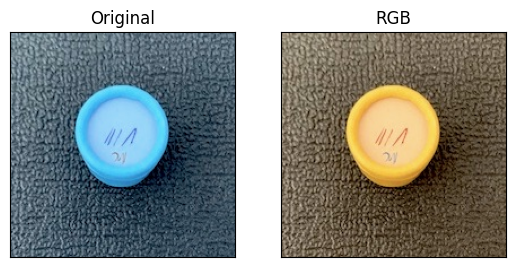

In [136]:
img_q32_org = cv.imread("images_doc/proc2-q1-object.jpeg")
assert img_q32_org is not None
img_q32_rgb = cv.cvtColor(img_q32_org, cv.COLOR_BGR2RGB)

plt.subplot(1, 2, 1), plt.imshow(img_q32_org)
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(img_q32_rgb)
plt.title("RGB"), plt.xticks([]), plt.yticks([])

plt.show()

Tentez de mettre en place un algorithme basé sur la luminosité permettant d'éliminer l'arrière-plan de cette image pour qu'il ne reste que l'objet en jaune sur un fond le plus noir possible.

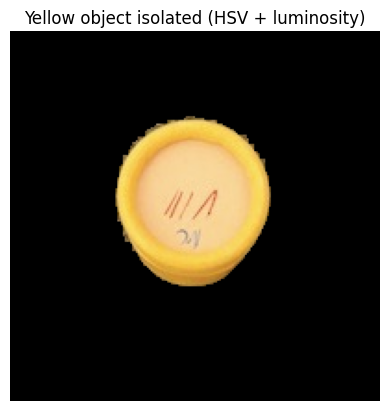

In [ ]:
hsv = cv.cvtColor(img_q32_rgb, cv.COLOR_RGB2HSV)

# Define yellow range in HSV
lower_yellow = np.array([0, 100, 100])
upper_yellow = np.array([100, 255, 255])
mask_hsv = cv.inRange(hsv, lower_yellow, upper_yellow)

lum = img_q32_rgb.mean(axis=2)  # Luminosity measured from mean of RGB channels
lum_thresh = 130  # NOTE: adjust luminosity threshold as needed
mask_lum = lum > lum_thresh

mask_combined = mask_hsv | mask_lum

result = img_q32_rgb.copy()
result[mask_combined == 0] = [0, 0, 0]

# Clean the remaining noise (upper left corner) using morphological transformations
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
mask_clean = cv.morphologyEx(mask_combined.astype(np.uint8), cv.MORPH_OPEN, kernel)
result[mask_clean == 0] = [0, 0, 0]

plt.figure(1)
plt.imshow(result)
plt.title("Yellow object isolated (HSV + luminosity)")
plt.axis("off")
plt.show()


## Filtrage linéaire

### Q3.1 

Soit l'image suivante ainsi que sa transformée de Fourier :

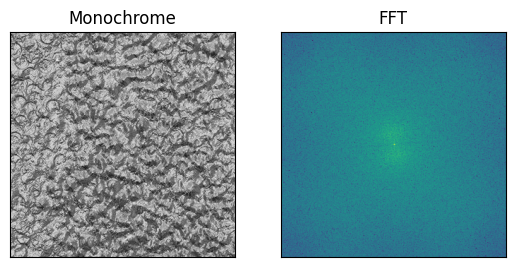

In [141]:
img_q4_org = cv.imread("images_doc/proc2-q2-texture.jpeg")
assert img_q4_org is not None

img_q4_mono = np.float32(cv.cvtColor(img_q4_org, cv.COLOR_BGR2GRAY)) / 255.0


def get_fft_mag(img):
    img_fft = np.fft.fft2(img)
    img_fft = np.fft.fftshift(img_fft)
    img_fft = 20 * np.log(np.abs(img_fft))
    return img_fft


img_q4_fft = get_fft_mag(img_q4_mono)

plt.subplot(1, 2, 1), plt.imshow(img_q4_mono, cmap="gray")
plt.title("Monochrome"), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(img_q4_fft)
plt.title("FFT"), plt.xticks([]), plt.yticks([])

plt.show()

(Source de l'image originale : [Hoang Le, Pexels](https://www.pexels.com/photo/black-and-white-black-and-white-pattern-rough-978462/)).

**a)** Filtrez cette image à l'aide d'une convolution de façon à ce que la valeur de chaque pixel soit la valeur moyenne de ses voisins dans un carré de 15x15.

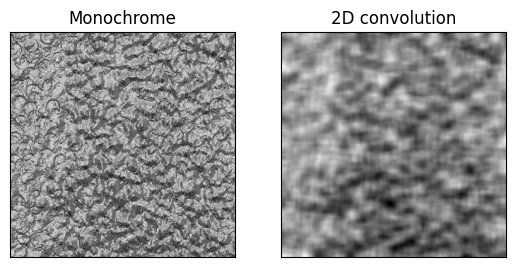

In [ ]:
filter_kernel = np.ones((15, 15)) / (15 * 15)

convolution = cv.filter2D(img_q4_mono.copy(), -1, filter_kernel)

plt.subplot(1, 2, 1), plt.imshow(img_q4_mono, cmap="gray")
plt.title("Monochrome"), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(convolution, cmap="gray")
plt.title("2D convolution"), plt.xticks([]), plt.yticks([])

plt.show()


**b)** Comparez le résultat avec celui de la fonction cv2.GaussianBlur() avec un noyau de convolution de la même taille.

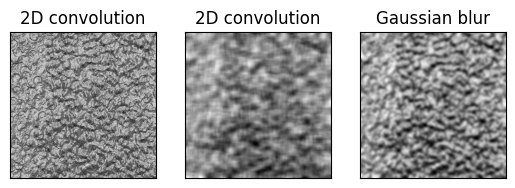

In [140]:
gaussian_blur = cv.GaussianBlur(img_q4_mono.copy(), (15, 15), 0.0)

plt.subplot(1, 3, 1), plt.imshow(img_q4_mono, cmap="gray")
plt.title("2D convolution"), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(convolution, cmap="gray")
plt.title("2D convolution"), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(gaussian_blur, cmap="gray")
plt.title("Gaussian blur"), plt.xticks([]), plt.yticks([])

plt.show()


**c)** Comment expliquez-vous la différence ?

Réponse:

La convolution 2D (*mean filtering*) applique le même poids à tous les pixels voisins, ce qui lisse l’image en supprimant les détails fins et le bruit, mais peut introduire des artéfacts (bords moins naturels).

Le flou gaussien (*gaussian blur*) utilise un noyau pondéré selon une distribution gaussienne: les pixels près du centre ont plus d'influence que ceux éloignés. Cela produit un lissage plus naturel, préserve mieux les transitions, et réduit les artéfacts. Le flou gaussien est donc généralement préféré pour le filtrage d'images.